In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
e_axis_400_3 = np.load('m2_abs_e_axis__400f5p45.npy')
spec_400_3= np.load('n2_abs_400f5p45.npy')
e_axis_400_4 = np.load('m2_abs_e_axis__400f5p35.npy')
spec_400_4= np.load('n2_abs_400f5p35.npy')
e_axis_400_5 = np.load('m2_abs_e_axis__400f5p4.npy')
spec_400_5= np.load('n2_abs_400f5p4.npy')
e_axis_400_2 = np.load('m2_abs_e_axis__400f5p3.npy')
spec_400_2= np.load('n2_abs_400f5p3.npy')
e_axis_400 = np.load('m2_abs_e_axis__400.npy')
spec_400= np.load('n2_abs_400.npy')
e_axis = np.load('m2_abs_e_axis.npy')
spec= np.load('n2_abs.npy')
spec_wo= np.load('n2_abs_wo.npy')
spec_2 = np.load('n2_abs_wo_401.npy')
e_axis_2= np.load('m2_abs_e_axis_wo_401.npy')

In [3]:
from scipy.optimize import curve_fit

def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


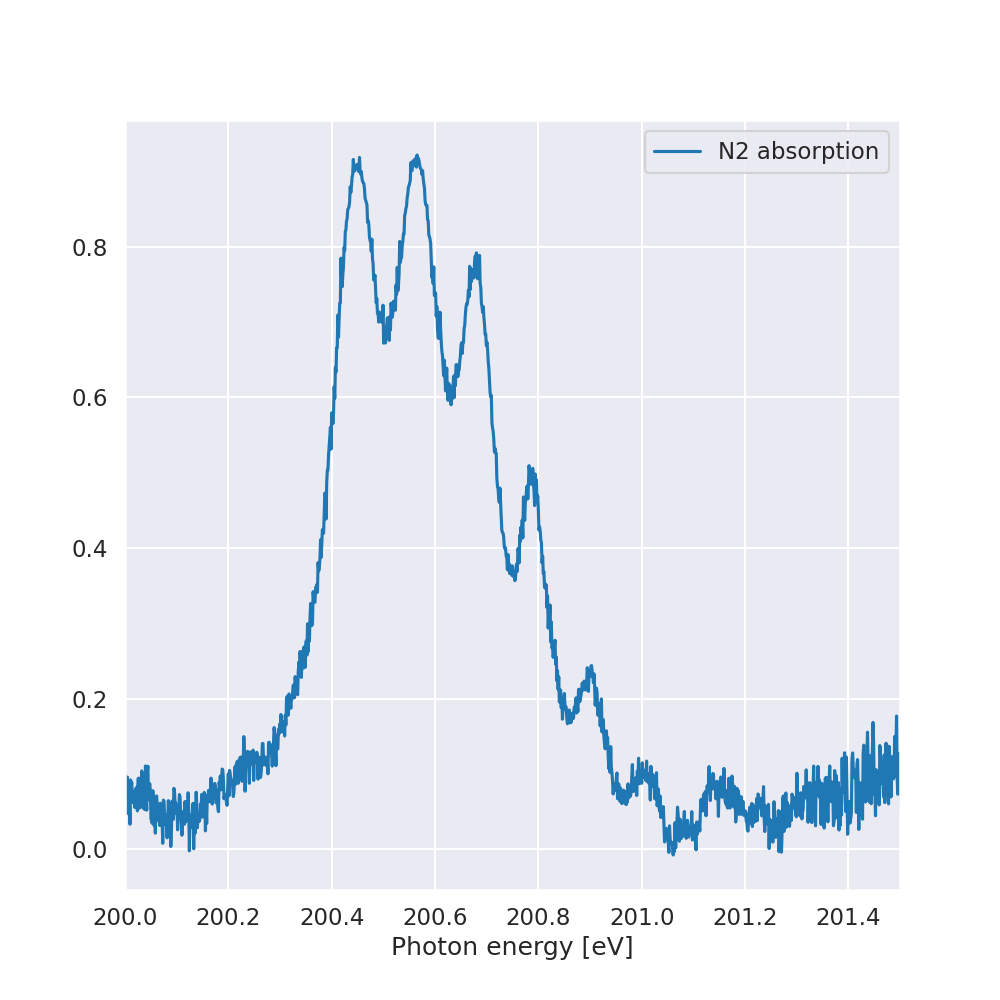

In [15]:
guess = gauss(e_axis_400_5,*[0.1, 1, 200.67, 0.579])
a = np.arange(0,500)
b = np.arange(1300,2000)
hole = np.concatenate((a,b))
this_spec = spec_400_5.mean(axis=0)/max(spec_400_5.mean(axis=0))
spec_hole = this_spec[hole]
scan_fit = gauss_fit(e_axis_400[hole], spec_hole)
sns.set_style("darkgrid")
sns.set_context("talk")
plt.figure(figsize=[10,10])
# this_spec = spec.mean(axis=0)/spec_wo.mean(axis=0)
# plt.plot(e_axis, this_spec/max(this_spec))
# this_spec = spec_2.mean(axis=0)/max(spec_2.mean(axis=0))
# plt.plot(e_axis_2,this_spec/max(this_spec))
# this_spec = spec_400.mean(axis=0)/max(spec_400.mean(axis=0))
# plt.plot(e_axis_400,this_spec/max(this_spec), label='54')
# this_spec = spec_400_2.mean(axis=0)/max(spec_400_2.mean(axis=0))
# plt.plot(e_axis_400_2,this_spec/max(this_spec), label='53')
# this_spec = spec_400_3.mean(axis=0)/max(spec_400_3.mean(axis=0))
# plt.plot(e_axis_400_3,this_spec/max(this_spec), label='545')
# this_spec = spec_400_4.mean(axis=0)/max(spec_400_4.mean(axis=0))
# plt.plot(e_axis_400_4,this_spec/max(this_spec), label='535')

plt.plot(e_axis_400_5,-this_spec/guess+1.08, label='N2 absorption')

# plt.xlim([400,402])
plt.xlim([200.0,201.5])
plt.xlabel('Photon energy [eV]')
plt.legend()
plt.grid(True)
plt.savefig('N2abs')